In [21]:
import pandas as pd
import jieba
import numpy
#pip install jieba

### 数据源：http://www.sogou.com/labs/resource/ca.php ###

In [22]:
df_news = pd.read_table('./data/val.txt',names=['category','theme','URL','content'],encoding='utf-8')
df_news = df_news.dropna()
df_news.head()

,category,theme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


In [23]:
df_news.shape

(5000, 4)

###  分词：使用结吧分词器 ###

In [24]:
content = df_news.content.values.tolist()
print (content[1000])

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏


In [25]:
content_S = []
for line in content:
    # 分词
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        content_S.append(current_segment)

In [26]:
content_S[1000]

['阿里巴巴',
 '集团',
 '昨日',
 '宣布',
 '，',
 '将',
 '在',
 '集团',
 '管理',
 '层面',
 '设立',
 '首席',
 '数据',
 '官',
 '岗位',
 '（',
 'Ｃ',
 'ｈ',
 'ｉ',
 'ｅ',
 'ｆ',
 '\u3000',
 'Ｄ',
 'ａ',
 'ｔ',
 'ａ',
 '\u3000',
 'Ｏ',
 'ｆ',
 'ｆ',
 'ｉ',
 'ｃ',
 'ｅ',
 'ｒ',
 '）',
 '，',
 '阿里巴巴',
 'Ｂ',
 '２',
 'Ｂ',
 '公司',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '陆兆禧',
 '将',
 '会',
 '出任',
 '上述',
 '职务',
 '，',
 '向',
 '集团',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '马云',
 '直接',
 '汇报',
 '。',
 '＞',
 '菹',
 'ぃ',
 '和',
 '６',
 '月初',
 '的',
 '首席',
 '风险',
 '官',
 '职务',
 '任命',
 '相同',
 '，',
 '首席',
 '数据',
 '官亦为',
 '阿里巴巴',
 '集团',
 '在',
 '完成',
 '与',
 '雅虎',
 '股权',
 '谈判',
 '，',
 '推进',
 '“',
 'ｏ',
 'ｎ',
 'ｅ',
 '\u3000',
 'ｃ',
 'ｏ',
 'ｍ',
 'ｐ',
 'ａ',
 'ｎ',
 'ｙ',
 '”',
 '目标',
 '后',
 '，',
 '在',
 '集团',
 '决策',
 '层面',
 '新增',
 '的',
 '管理',
 '岗位',
 '。',
 '０',
 '⒗',
 '锛',
 '团',
 '昨日',
 '表示',
 '，',
 '“',
 '变成',
 '一家',
 '真正',
 '意义',
 '上',
 '的',
 '数据',
 '公司',
 '”',
 '已',
 '是',
 '战略',
 '共识',
 '。',
 '记者',
 '刘夏']

In [27]:
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


In [28]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head(20)

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [29]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

#df_content.content_S.isin(stopwords.stopword)
#df_content=df_content[~df_content.content_S.isin(stopwords.stopword)]
#df_content.head()

In [30]:
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content.head()

,contents_clean
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [31]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,Ｕ


In [32]:
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg([("count","count")])
words_count=words_count.reset_index().sort_values(by=["count"],ascending=False)
words_count.head()

,all_words,count
4077,中,5199
4209,中国,3115
88255,说,3055
104747,Ｓ,2646
1373,万,2390


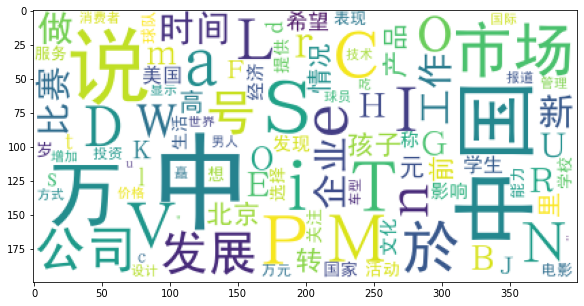

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

#  TF-IDF ：提取关键词
TF是词频(Term Frequency), TF = 当前类中该词次数/当前类中所有词次数

IDF是逆向文件频率(Inverse Document Frequency), IDF = log(总类数/包含该词条的类数+1)

TF-IDF实际上是：TF * IDF

In [37]:
# jeba 实现
import jieba.analyse
index = 2400
content_S_str = "".join(content_S[index])  
print(content_S_str)
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))

法国ＶＳ西班牙、里贝里ＶＳ哈维，北京时间６月２４日凌晨一场的大战举世瞩目，而这场胜利不仅仅关乎两支顶级强队的命运，同时也是他们背后的球衣赞助商耐克和阿迪达斯之间的一次角逐。Ｔ谌胙”窘炫分薇的１６支球队之中，阿迪达斯和耐克的势力范围也是几乎旗鼓相当：其中有５家球衣由耐克提供，而阿迪达斯则赞助了６家，此外茵宝有３家，而剩下的两家则由彪马赞助。而当比赛进行到现在，率先挺进四强的两支球队分别被耐克支持的葡萄牙和阿迪达斯支持的德国占据，而由于最后一场１／４决赛是茵宝（英格兰）和彪马（意大利）的对决，这也意味着明天凌晨西班牙同法国这场阿迪达斯和耐克在１／４决赛的唯一一次直接交手将直接决定两家体育巨头在此次欧洲杯上的胜负。８据评估，在２０１２年足球商品的销售额能总共超过４０亿欧元，而单单是不足一个月的欧洲杯就有高达５亿的销售额，也就是说在欧洲杯期间将有７００万件球衣被抢购一空。根据市场评估，两大巨头阿迪达斯和耐克的市场占有率也是并驾齐驱，其中前者占据３８％，而后者占据３６％。体育权利顾问奥利弗－米歇尔在接受《队报》采访时说：“欧洲杯是耐克通过法国翻身的一个绝佳机会！”Ｃ仔尔接着谈到两大赞助商的经营策略：“竞技体育的成功会燃起球衣购买的热情，不过即便是水平相当，不同国家之间的欧洲杯效应却存在不同。在德国就很出色，大约１／４的德国人通过电视观看了比赛，而在西班牙效果则差很多，由于民族主义高涨的加泰罗尼亚地区只关注巴萨和巴萨的球衣，他们对西班牙国家队根本没什么兴趣。”因此尽管西班牙接连拿下欧洲杯和世界杯，但是阿迪达斯只为西班牙足协支付每年２６００万的赞助费＃相比之下尽管最近两届大赛表现糟糕法国足协将从耐克手中每年可以得到４０００万欧元。米歇尔解释道：“法国创纪录的４０００万欧元赞助费得益于阿迪达斯和耐克竞逐未来１５年欧洲市场的竞争。耐克需要笼络一个大国来打赢这场欧洲大陆的战争，而尽管德国拿到的赞助费并不太高，但是他们却显然牢牢掌握在民族品牌阿迪达斯手中。从长期投资来看，耐克给法国的赞助并不算过高。”
耐克  阿迪达斯  欧洲杯  球衣  西班牙


###  LDA ：主题模型###

格式要求：list of list形式，分词好的的整个语料

In [ ]:
from gensim import corpora, models, similarities
import gensim
#http://radimrehurek.com/gensim/

In [ ]:
#做映射，相当于词袋
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]

In [ ]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20) #类似Kmeans自己指定K值

In [ ]:
#一号分类结果
print (lda.print_topic(1, topn=5))

In [ ]:
for topic in lda.print_topics(num_topics=20, num_words=5):
    print (topic[1])

In [ ]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train.tail()

In [ ]:
df_train.label.unique()

In [ ]:
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [ ]:
#x_train = x_train.flatten()
x_train[0][1]

In [ ]:
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[0]        

In [ ]:
print (len(words))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer(ngram_range=(1,4))
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vec.fit(words)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

In [ ]:
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[0]

In [ ]:
classifier.score(vec.transform(test_words), y_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

In [ ]:
classifier.score(vectorizer.transform(test_words), y_test)